### Project Brief
HELP is an NGO is committed to fight poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 
CEO of the NGO needs to decide how to use this money strategically and effectively. 
Significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

### Goal of data analysis:- 
Categorize the countries using some socio-economic and health factors that determine the overall development of the country
Suggest the countries which the CEO needs to focus on the most

### Business objective
Cluster the countries by the factors mentioned above.
Use dimensionality reduction using PCA to get the visualisations of clusters in a 2-D form



### Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [2]:
# Importing country dataset
df_country = pd.read_csv("Country-data.csv")

### Let's understand the structure of our dataframe

In [3]:
# Let's see the head of our country dataset
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### Data Preparation

In [6]:
df_country1 = df_country['country']

In [7]:
df_country1.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

### Checking for Outliers

In [8]:
# Checking for outliers in the continuous variables
df_country_new = df_country[['child_mort','exports','health','imports', 'income', 'inflation', 'total_fer', 'gdpp']]

In [9]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_country_new.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,6.563600,79088.000000


In [10]:
# Checking the percentage of missing values
round(100*(df_country.isnull().sum()/len((df_country).index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Feature Standardisation

In [11]:
# Normalising continuous features
df = df_country[['child_mort','exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [12]:
normalized_df=(df-df.mean())/df.std()
df_country = df_country.drop(['child_mort','exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], 1)
df_country = pd.concat([df_country,normalized_df],axis=1)
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [13]:
df_country_original = df_country

In [14]:
df_country_original.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


## Model Building

In [15]:
# Dropping country column
df_country = df_country.drop(['country'],axis=1)

### Running Your First Training Model

In [16]:
df_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### Correlation Matrix

In [17]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

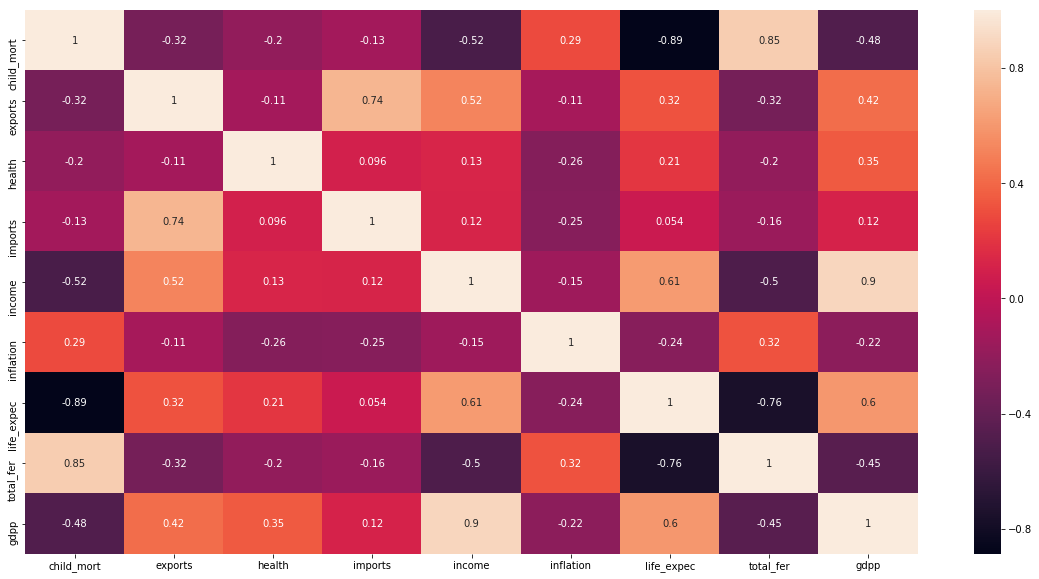

In [18]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_country.corr(),annot = True)

In [19]:
import statsmodels.api as sm

### PCA on the data


Note -
While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
So we'll calculate the PCs using the train data, and apply them later on the test data

In [20]:
df_country.shape

(167, 9)

In [21]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [22]:
#Doing the PCA on the train data
pca.fit(df_country)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axis

In [23]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [24]:
colnames = list(df_country.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3], 'Feature':colnames})
#pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income


In [25]:
pcs_df

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


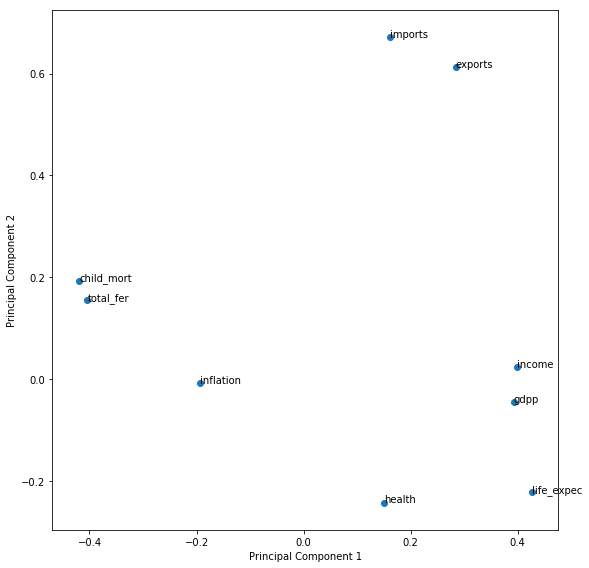

In [26]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the fist component is in the direction where the 'charges' variables are heavy
 - These 4 components also have the highest of the loadings

#### Looking at the screeplot to assess the number of needed principal components

In [27]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

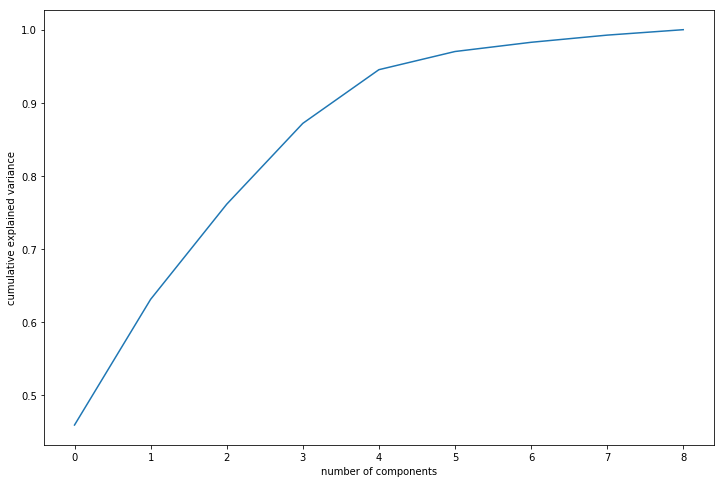

In [28]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 90-95% of the variance in the dataset
- We'll choose 4 components for our modeling

In [29]:
#Using Incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs

In [30]:
df_train_pca = pca_final.fit_transform(df_country.values)
df_train_pca.shape

(167, 4)

In [31]:
df_train_pca = pd.DataFrame(df_train_pca)

In [32]:
df_train_pca.head()

,0,1,2,3
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


#### Creating correlation matrix for the principal components - we expect little to no correlation

In [33]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

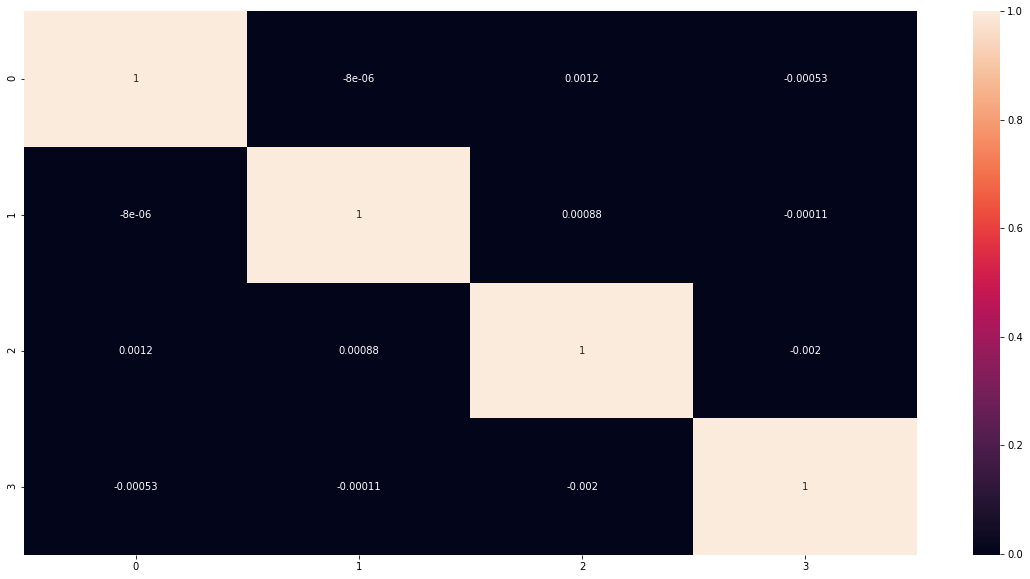

In [34]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [35]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092543056 , min corr:  -0.0020378295355501573


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [36]:
df_train_pca.head()

,0,1,2,3
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


In [37]:
df_train_pca.columns = ['PC1','PC2','PC3','PC4']

In [38]:
df_train_pca.head()

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


In [39]:
#Concatenating df_train_pca dataframe and country dataframe country1
df_pca = pd.concat([df_train_pca, df_country1], axis=1)

In [40]:
df_pca.shape

(167, 5)

In [41]:
df_pca.head()

,PC1,PC2,PC3,PC4,country
0,-2.905050,0.088089,0.718841,0.993710,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,Angola
4,1.028893,0.130097,0.192344,-0.842275,Antigua and Barbuda


In [42]:
df_pca.describe()

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-4.254747e-17,-1.628770e-17,-1.379469e-17,1.994413e-18
std,2.033610e+00,1.243405e+00,1.080123e+00,9.972386e-01
min,-4.864295e+00,-2.982227e+00,-5.573507e+00,-1.577417e+00
25%,-1.379425e+00,-7.458916e-01,-4.142286e-01,-7.877837e-01
50%,2.411118e-02,-9.316020e-02,1.931701e-01,-2.930648e-01
75%,1.220561e+00,5.552236e-01,5.125301e-01,7.069460e-01
max,6.897479e+00,6.665328e+00,2.848803e+00,3.140754e+00


Doing outlier analysis now:

### Outlier Treatment

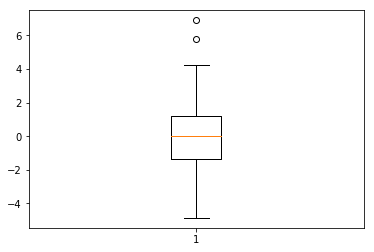

In [43]:
#Outlier treatment for PC1
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]

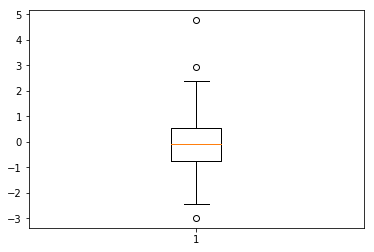

In [44]:
#Outlier treatment for PC2
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]

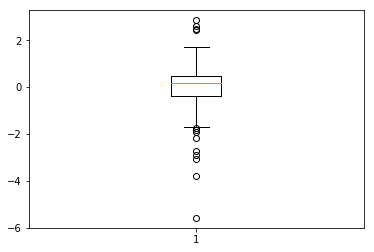

In [45]:
#Outlier treatment for PC3
plt.boxplot(df_pca.PC3)
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]

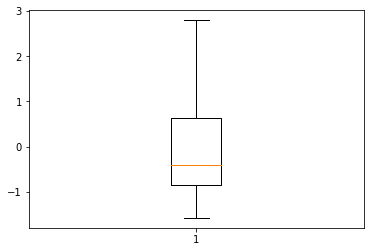

In [46]:
#Outlier treatment for PC4
plt.boxplot(df_pca.PC4)
Q1 = df_pca.PC4.quantile(0.25)
Q3 = df_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC4 >= Q1 - 1.5*IQR) & (df_pca.PC4 <= Q3 + 1.5*IQR)]

In [47]:
df_pca.head()

,PC1,PC2,PC3,PC4,country
0,-2.905050,0.088089,0.718841,0.993710,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,Angola
4,1.028893,0.130097,0.192344,-0.842275,Antigua and Barbuda


In [48]:
df_pca.describe()

,PC1,PC2,PC3,PC4
count,149.000000,149.000000,149.000000,149.000000
mean,-0.154057,-0.127718,0.091165,-0.085931
std,1.854734,0.961479,0.706754,0.922753
min,-4.405521,-2.439684,-1.716549,-1.577417
25%,-1.525546,-0.777819,-0.294368,-0.842275
50%,0.011103,-0.106252,0.211773,-0.401836
75%,1.144175,0.541007,0.485182,0.641620
max,4.075670,2.370450,1.717685,2.795629


In [49]:
df_pca_country = df_pca['country']

In [50]:
df_pca_country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [51]:
df_pca = df_pca.drop(['country'],axis=1)

In [52]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [53]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [56]:
hopkins(df_pca)

0.7775095091324615

## K-Means with some K

In [57]:
# Kmeans with K=5
from sklearn.cluster import KMeans

model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [58]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

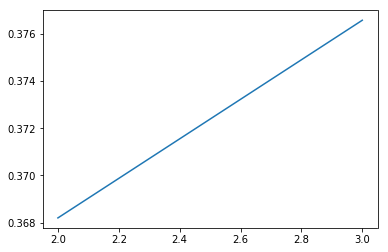

In [59]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

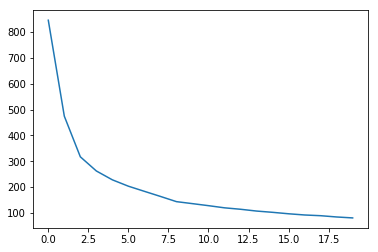

In [60]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

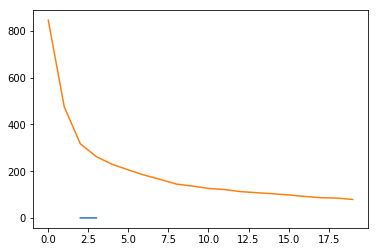

In [61]:
### K-Means with some K

# Kmeans with K=5

model_clus51 = KMeans(n_clusters = 5, max_iter=50)
model_clus51.fit(df_pca)

### Silhouette Analysis

sse1_ = []
for k in range(2, 5):
    kmeans1 = KMeans(n_clusters=k).fit(df_pca)
    sse1_.append([k, silhouette_score(df_pca, kmeans1.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Sum of Squared Distances

# sum of squared distances
ssd1 = []
for num_clusters in list(range(1,21)):
    model_clus1 = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus1.fit(df_pca)
    ssd1.append(model_clus1.inertia_)

plt.plot(ssd1)

In [62]:
df_pca.describe()

,PC1,PC2,PC3,PC4
count,149.000000,149.000000,149.000000,149.000000
mean,-0.154057,-0.127718,0.091165,-0.085931
std,1.854734,0.961479,0.706754,0.922753
min,-4.405521,-2.439684,-1.716549,-1.577417
25%,-1.525546,-0.777819,-0.294368,-0.842275
50%,0.011103,-0.106252,0.211773,-0.401836
75%,1.144175,0.541007,0.485182,0.641620
max,4.075670,2.370450,1.717685,2.795629


In [63]:
# analysis of clusters formed
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km = pd.concat([df_pca, pd.Series(model_clus5.labels_)], axis=1)

In [64]:
df_pca_km.head()

,PC1,PC2,PC3,PC4,0
0,-2.905050,0.088089,0.718841,0.993710,0
1,0.428070,-0.586096,0.320090,-1.167681,1
2,-0.282140,-0.445318,-1.221462,-0.847578,1
3,-2.922180,1.694341,-1.517172,0.873340,0
4,1.028893,0.130097,0.192344,-0.842275,3


In [65]:
df_pca_km.columns = ["PC1", "PC2", "PC3", "PC4", "ClusterID"]

In [66]:
df_pca_km.shape

(149, 5)

In [67]:
df_pca_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,0
1,0.428070,-0.586096,0.320090,-1.167681,1
2,-0.282140,-0.445318,-1.221462,-0.847578,1
3,-2.922180,1.694341,-1.517172,0.873340,0
4,1.028893,0.130097,0.192344,-0.842275,3


In [68]:
#Concatenating df dataframe and country dataframe country1
df_pca_c = pd.concat([df_pca_country, df_pca_km], axis=1)

In [69]:
df_pca_c.shape

(164, 6)

In [71]:
df_pca_c.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0.0
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1.0
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1.0
3,Angola,-2.922180,1.694341,-1.517172,0.873340,0.0
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,3.0


In [72]:
df_country_original.shape

(167, 10)

In [73]:
df_country_original.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [74]:
print(type(df_country_original))

<class 'pandas.core.frame.DataFrame'>


In [75]:
print(type(df_pca_c))

<class 'pandas.core.frame.DataFrame'>


In [76]:
df_country_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


In [77]:
df_pca_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 166
Data columns (total 6 columns):
country      149 non-null object
PC1          149 non-null float64
PC2          149 non-null float64
PC3          149 non-null float64
PC4          149 non-null float64
ClusterID    149 non-null float64
dtypes: float64(5), object(1)
memory usage: 9.0+ KB


In [78]:
df_pca_c.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0.0
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1.0
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1.0
3,Angola,-2.922180,1.694341,-1.517172,0.873340,0.0
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,3.0


In [79]:
#Merging using inner join on country column
df_pca_cluster = pd.merge(df_pca_c, df_country_original, on='country', how='inner')

In [80]:
df_pca_cluster.shape

(149, 15)

In [81]:
df_pca_cluster.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0.0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1.0,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1.0,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,-2.922180,1.694341,-1.517172,0.873340,0.0,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,3.0,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [82]:
#Anaylsis of clusters by taking mean

df_pca_cluster_PC1 = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).PC1.mean())
df_pca_cluster_PC2 = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).PC2.mean())
df_pca_cluster_PC3 = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).PC3.mean())
df_pca_cluster_PC4 = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).PC4.mean())
df_pca_cluster_child_mort = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).child_mort.mean())
df_pca_cluster_exports = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).exports.mean())
df_pca_cluster_health = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).health.mean())
df_pca_cluster_imports = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).imports.mean())
df_pca_cluster_income = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).income.mean())
df_pca_cluster_inflation = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).inflation.mean())
df_pca_cluster_life_expec = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).life_expec.mean())
df_pca_cluster_total_fer = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).total_fer.mean())
df_pca_cluster_gdpp = 	pd.DataFrame(df_pca_cluster.groupby(["ClusterID"]).gdpp.mean())

In [83]:
df_kmeans = pd.concat([pd.Series([0,1,2,3,4]), df_pca_cluster_PC1, df_pca_cluster_PC2, df_pca_cluster_PC3, df_pca_cluster_PC4, df_pca_cluster_child_mort, df_pca_cluster_exports, df_pca_cluster_health, df_pca_cluster_imports, df_pca_cluster_income, df_pca_cluster_inflation, df_pca_cluster_life_expec, df_pca_cluster_total_fer,  df_pca_cluster_gdpp], axis=1)
df_kmeans.columns = ["ClusterID", "PC1_mean", "PC2_mean", "PC3_mean", "PC4_mean", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_kmeans.head()

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-2.492805,0.451339,-0.007579,0.667306,0.369110,-0.067602,-0.027234,-0.007250,-0.300821,-0.081792,-0.302920,0.338235,-0.309515
1,1,-0.317680,-0.701623,-0.330729,-0.738490,-0.141215,-0.218622,0.011379,-0.380414,0.022537,-0.011189,0.307337,-0.186000,0.152324
2,2,2.581300,-1.082748,0.313695,1.055989,-0.189286,0.049418,0.247472,0.065930,0.035228,-0.062051,0.132762,-0.069816,0.150897
3,3,0.807222,0.348907,0.372841,-0.722636,-0.015434,-0.108362,-0.091871,-0.013398,-0.154966,-0.250353,-0.101841,-0.117400,-0.135691
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


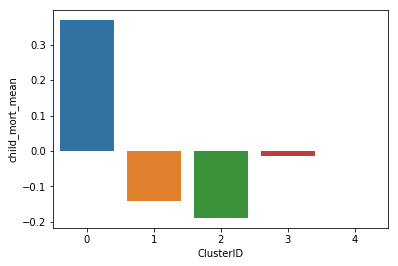

In [85]:
#Plotting barplot between Cluster ID and Child mortality rate
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.child_mort_mean)

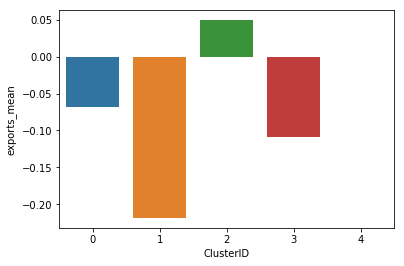

In [86]:
#Plotting barplot between Cluster ID and Exports
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.exports_mean)

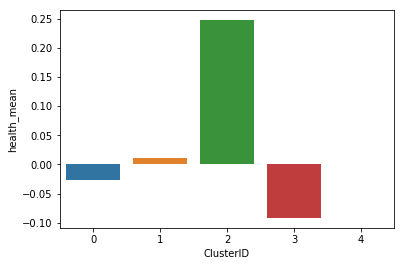

In [87]:
#Plotting barplot between Cluster ID and Health
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.health_mean)

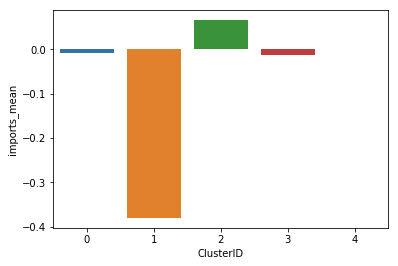

In [88]:
#Plotting barplot between Cluster ID and Imports
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.imports_mean)

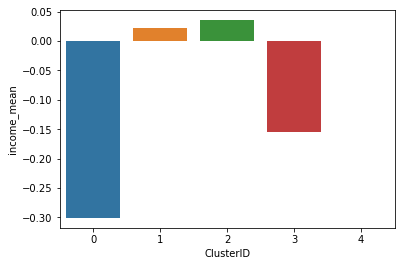

In [89]:
#Plotting barplot between Cluster ID and Income
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.income_mean)

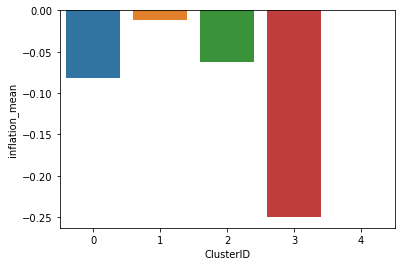

In [90]:
#Plotting barplot between Cluster ID and Inflation rate
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.inflation_mean)

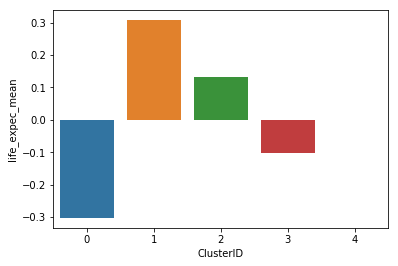

In [91]:
#Plotting barplot between Cluster ID and Life expecting rate
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.life_expec_mean)

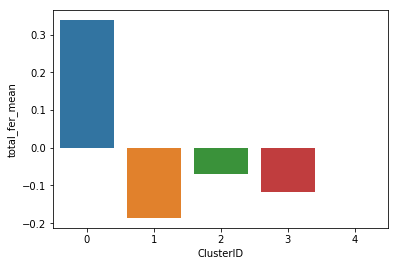

In [92]:
#Plotting barplot between Cluster ID and Total fer
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.total_fer_mean)

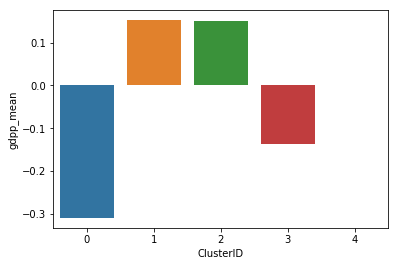

In [93]:
#Plotting barplot between Cluster ID and GDPP
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.gdpp_mean)

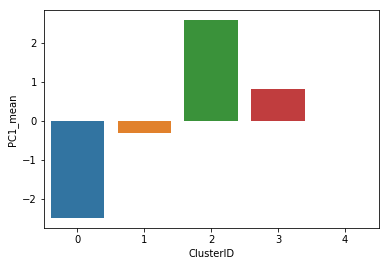

In [94]:
#Plotting barplot between Cluster ID and PC1
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.PC1_mean)

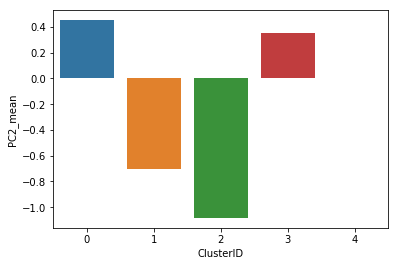

In [95]:
#Plotting barplot between Cluster ID and PC2
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.PC2_mean)

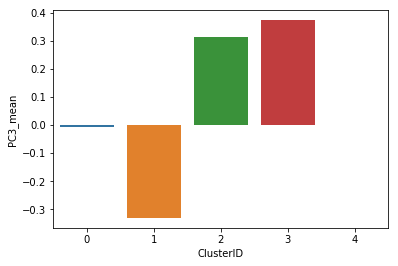

In [96]:
#Plotting barplot between Cluster ID and PC3
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.PC3_mean)

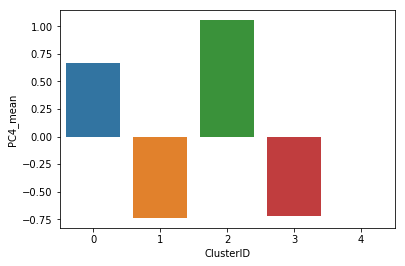

In [97]:
#Plotting barplot between Cluster ID and PC4
sns.barplot(x=df_kmeans.ClusterID, y=df_kmeans.PC4_mean)

In [98]:
#Finding country with cluster ID=3
df_pca_cluster.loc[df_pca_cluster['ClusterID'] == 3]

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,3.0,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692
10,Bahamas,1.262278,-0.663093,0.452173,0.059300,3.0,-0.606762,-0.222858,0.391108,-0.131775,0.298542,-0.773348,0.364809,-0.718675,0.820344
11,Bahrain,1.665727,0.558714,-1.017109,-0.177980,3.0,-0.735702,1.035715,-0.671932,0.165628,1.242620,-0.032338,0.612190,-0.520504,0.422062
13,Barbados,1.076855,-0.485220,0.647580,-0.531959,3.0,-0.596843,-0.058696,0.420233,0.074755,-0.095688,-0.705803,0.690902,-0.771520,0.165633
14,Belarus,0.581791,0.551733,-0.429355,-1.050560,3.0,-0.812570,0.375420,-0.438937,0.727389,-0.049003,0.692307,-0.017507,-0.963085,-0.378322
16,Belize,0.208717,0.688145,0.229818,-1.087832,3.0,-0.482781,0.623487,-0.588200,0.438247,-0.480582,-0.628325,0.094939,-0.157192,-0.470527
18,Bhutan,-0.157122,0.774914,0.268925,-1.043274,3.0,0.109845,0.050745,-0.588200,0.983486,-0.556316,-0.169509,0.173651,-0.375179,-0.588375
20,Bosnia and Herzegovina,0.994795,-0.963264,1.580119,-0.675520,3.0,-0.777855,-0.416204,1.559725,0.182150,-0.385137,-0.603728,0.702147,-1.081987,-0.455796
25,Burundi,-0.582492,0.885921,0.471175,-0.806824,3.0,1.371966,-1.174265,1.741753,-0.317652,-0.849706,0.427424,-1.445568,2.187827,-0.694711
28,Canada,-0.159072,0.337665,0.220015,-1.326860,3.0,-0.810090,-0.438092,1.632536,-0.656360,1.221871,-0.464665,1.208153,-0.870606,1.878793


In [99]:
len(df_pca_cluster.loc[df_pca_cluster['ClusterID'] == 3])

42

We have 18 countries for cluster id 3 which need the aid most.

Impt. Note: Results will vary every time this model will be run. Results published here at the time of code run.

## Heirarchical Clustering

In [100]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

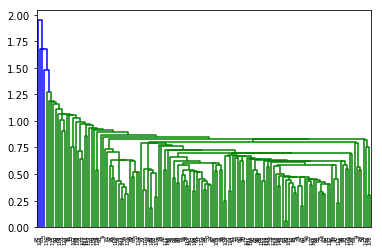

In [101]:
# heirarchical clustering
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

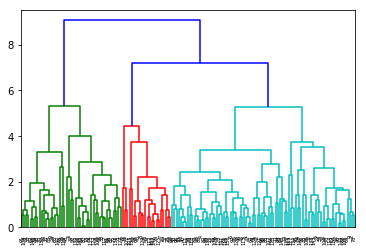

In [102]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [103]:
#Analyze cluster frames
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_cluster_hc = pd.concat([df_pca_cluster, clusterCut], axis=1)

In [104]:
#summarise

df_pca_cluster_hc_PC1 = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).PC1.mean())
df_pca_cluster_hc_PC2 = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).PC2.mean())
df_pca_cluster_hc_PC3 = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).PC3.mean())
df_pca_cluster_hc_PC4 = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).PC4.mean())
df_pca_cluster_hc_child_mort = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).child_mort.mean())
df_pca_cluster_hc_exports = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).exports.mean())
df_pca_cluster_hc_health = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).health.mean())
df_pca_cluster_hc_imports = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).imports.mean())
df_pca_cluster_hc_income = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).income.mean())
df_pca_cluster_hc_inflation = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).inflation.mean())
df_pca_cluster_hc_life_expec = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).life_expec.mean())
df_pca_cluster_hc_total_fer = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).total_fer.mean())
df_pca_cluster_hc_gdpp = 	pd.DataFrame(df_pca_cluster_hc.groupby(["ClusterID"]).gdpp.mean())

In [105]:
df_hierarchical = pd.concat([pd.Series([0,1,2,3,4]), df_pca_cluster_hc_PC1, df_pca_cluster_hc_PC2, df_pca_cluster_hc_PC3, df_pca_cluster_hc_PC4, df_pca_cluster_hc_child_mort, df_pca_cluster_hc_exports, df_pca_cluster_hc_health, df_pca_cluster_hc_imports, df_pca_cluster_hc_income, df_pca_cluster_hc_inflation, df_pca_cluster_hc_life_expec, df_pca_cluster_hc_total_fer, df_pca_cluster_hc_gdpp], axis=1)
df_hierarchical.columns = ["ClusterID", "PC1_mean", "PC2_mean", "PC3_mean", "PC4_mean", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_hierarchical.head()

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-2.492805,0.451339,-0.007579,0.667306,0.369110,-0.067602,-0.027234,-0.007250,-0.300821,-0.081792,-0.302920,0.338235,-0.309515
1,1,-0.317680,-0.701623,-0.330729,-0.738490,-0.141215,-0.218622,0.011379,-0.380414,0.022537,-0.011189,0.307337,-0.186000,0.152324
2,2,2.581300,-1.082748,0.313695,1.055989,-0.189286,0.049418,0.247472,0.065930,0.035228,-0.062051,0.132762,-0.069816,0.150897
3,3,0.807222,0.348907,0.372841,-0.722636,-0.015434,-0.108362,-0.091871,-0.013398,-0.154966,-0.250353,-0.101841,-0.117400,-0.135691
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


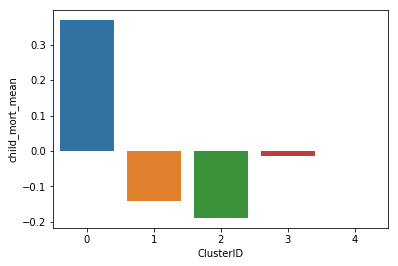

In [107]:
#Plotting barplot between Cluster ID and Child mortality rate
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.child_mort_mean)

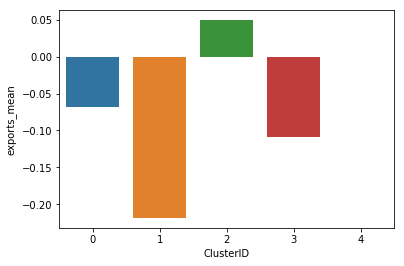

In [108]:
#Plotting barplot between Cluster ID and Exports
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.exports_mean)

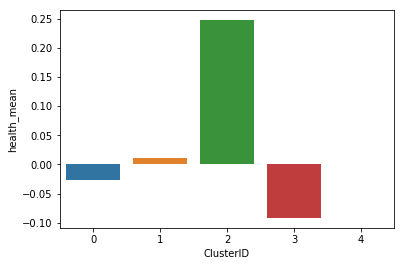

In [109]:
#Plotting barplot between Cluster ID and Health
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.health_mean)

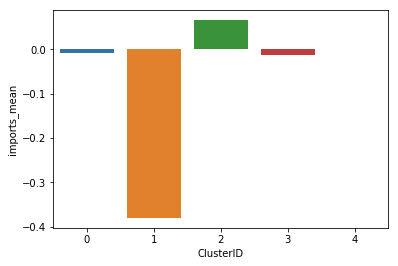

In [110]:
#Plotting barplot between Cluster ID and Imports
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.imports_mean)

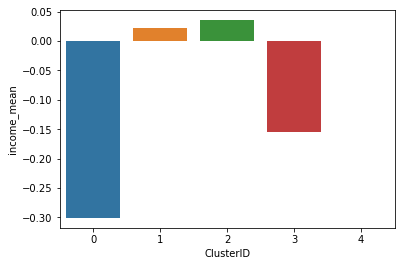

In [111]:
#Plotting barplot between Cluster ID and Income
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.income_mean)

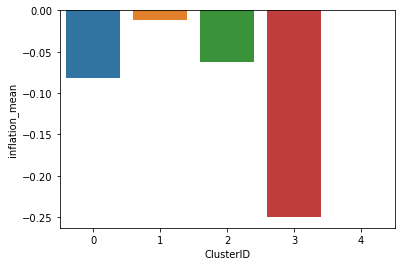

In [112]:
#Plotting barplot between Cluster ID and Inflation rate
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.inflation_mean)

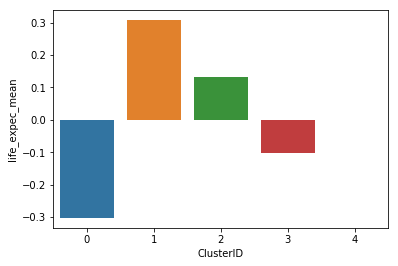

In [113]:
#Plotting barplot between Cluster ID and Life expecting rate
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.life_expec_mean)

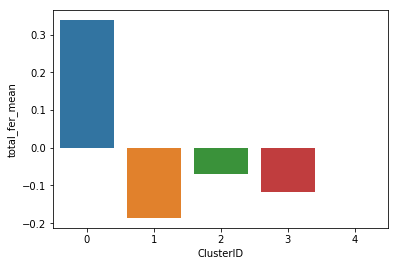

In [114]:
#Plotting barplot between Cluster ID and Total fer
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.total_fer_mean)

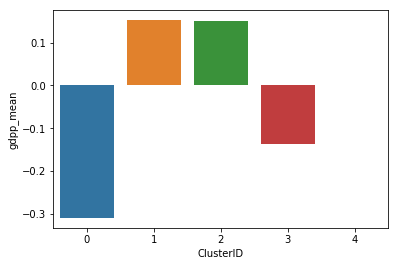

In [115]:
#Plotting barplot between Cluster ID and GDPP
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.gdpp_mean)

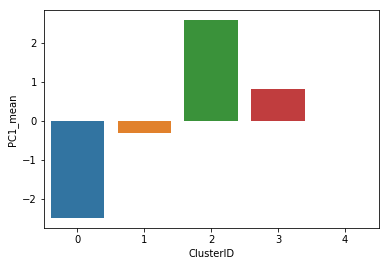

In [116]:
#Plotting barplot between Cluster ID and PC1
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.PC1_mean)

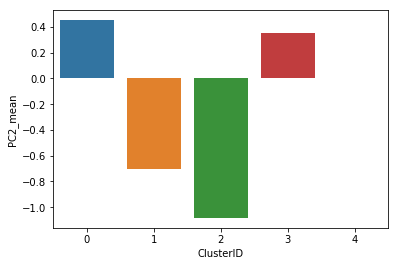

In [117]:
#Plotting barplot between Cluster ID and PC2
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.PC2_mean)

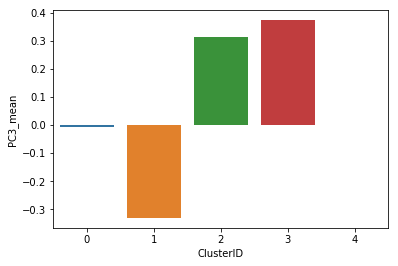

In [118]:
#Plotting barplot between Cluster ID and PC3
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.PC3_mean)

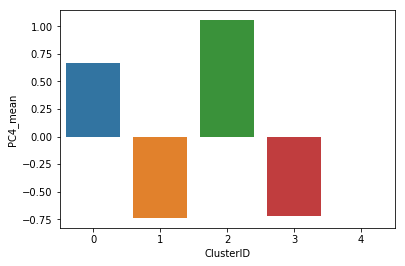

In [119]:
#Plotting barplot between Cluster ID and PC4
sns.barplot(x=df_hierarchical.ClusterID, y=df_hierarchical.PC4_mean)

In [120]:
#Finding country with cluster ID=3
len(df_pca_cluster.loc[df_pca_cluster['ClusterID'] == 3])

42

In [121]:
df_pca_cluster.loc[df_pca_cluster['ClusterID'] == 3]

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,3.0,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692
10,Bahamas,1.262278,-0.663093,0.452173,0.059300,3.0,-0.606762,-0.222858,0.391108,-0.131775,0.298542,-0.773348,0.364809,-0.718675,0.820344
11,Bahrain,1.665727,0.558714,-1.017109,-0.177980,3.0,-0.735702,1.035715,-0.671932,0.165628,1.242620,-0.032338,0.612190,-0.520504,0.422062
13,Barbados,1.076855,-0.485220,0.647580,-0.531959,3.0,-0.596843,-0.058696,0.420233,0.074755,-0.095688,-0.705803,0.690902,-0.771520,0.165633
14,Belarus,0.581791,0.551733,-0.429355,-1.050560,3.0,-0.812570,0.375420,-0.438937,0.727389,-0.049003,0.692307,-0.017507,-0.963085,-0.378322
16,Belize,0.208717,0.688145,0.229818,-1.087832,3.0,-0.482781,0.623487,-0.588200,0.438247,-0.480582,-0.628325,0.094939,-0.157192,-0.470527
18,Bhutan,-0.157122,0.774914,0.268925,-1.043274,3.0,0.109845,0.050745,-0.588200,0.983486,-0.556316,-0.169509,0.173651,-0.375179,-0.588375
20,Bosnia and Herzegovina,0.994795,-0.963264,1.580119,-0.675520,3.0,-0.777855,-0.416204,1.559725,0.182150,-0.385137,-0.603728,0.702147,-1.081987,-0.455796
25,Burundi,-0.582492,0.885921,0.471175,-0.806824,3.0,1.371966,-1.174265,1.741753,-0.317652,-0.849706,0.427424,-1.445568,2.187827,-0.694711
28,Canada,-0.159072,0.337665,0.220015,-1.326860,3.0,-0.810090,-0.438092,1.632536,-0.656360,1.221871,-0.464665,1.208153,-0.870606,1.878793


We have 18 countries for cluster id 3 which need the aid most 

Impt. Note: Results will vary every time this model will be run. Results published here at the time of code run.